# Project: Wrangling and Analyze Data

In [2]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


%matplotlib inline

## Data Gathering
In the cells below, I gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
tweet_arch=pd.read_csv('twitter-archive-enhanced.csv',sep=',')

2. Using the Requests library, I downloaded the tweet image prediction (image_predictions.tsv)

In [4]:
# Programatically download the datafile with breed predictions based on the tweet's image from a URL to insure reproducibility
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

In [20]:
auth=OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

#API instance
# Create the Twitter API object and set rate limit params


api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [21]:
# Dataframe with the tweet ids in twitter_archive-enhanced.csv
tweet_ids = tweet_arch.tweet_id

In [23]:
# retrieve the full JSON for the status of each id in twitter-archive-enhanced.csv
# This script takes over 35 minutes to run
failed_id = []
with open('tweet_json.txt', 'w', encoding='UTF-8') as json_file:
    for id_ in tweet_ids:
        try:
            tweet = api.get_status(id_)
            tweet = tweet._json
            json.dump(tweet, json_file)
            json_file.write('\n')
        except:
            print('Failed retrieving tweet with id ',id_)
            failed_id.append(id_)
    

Failed retrieving tweet with id  888202515573088257
Failed retrieving tweet with id  873697596434513921
Failed retrieving tweet with id  872668790621863937
Failed retrieving tweet with id  872261713294495745
Failed retrieving tweet with id  869988702071779329
Failed retrieving tweet with id  866816280283807744
Failed retrieving tweet with id  861769973181624320
Failed retrieving tweet with id  856602993587888130
Failed retrieving tweet with id  856330835276025856
Failed retrieving tweet with id  851953902622658560
Failed retrieving tweet with id  851861385021730816
Failed retrieving tweet with id  845459076796616705
Failed retrieving tweet with id  844704788403113984
Failed retrieving tweet with id  842892208864923648
Failed retrieving tweet with id  837366284874571778
Failed retrieving tweet with id  837012587749474308
Failed retrieving tweet with id  829374341691346946
Failed retrieving tweet with id  827228250799742977
Rate limit reached. Sleeping for: 761
Failed retrieving tweet wi

In [6]:
# Read the contents of the created file and create a dataframe with the fields of interest 

df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
tweet_df = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Gathering Conclusion

## Assessing Data
 
 In the cells belows, I will carry out visual and programmtic accessment of the datasets gathered above.
 The goal here is to detect Quality and Tidiness issues that will make data cleaning have direction.


In [7]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
create_date       2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [10]:
tweet_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Programmatic Accessment

In [11]:
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#shows sources of tweets
tweet_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
#gives the top 30 ratings based on value counts
tweet_arch.rating_numerator.value_counts().head(30)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
0        2
15       2
75       2
80       1
20       1
24       1
26       1
44       1
50       1
60       1
165      1
84       1
88       1
144      1
182      1
Name: rating_numerator, dtype: int64

In [14]:
tweet_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
tweet_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
tweet_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
tweet_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
tweet_arch.tail(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [19]:
tweet_arch.name.value_counts().head(30)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
an           7
Daisy        7
Buddy        7
Bailey       7
Dave         6
Jack         6
Milo         6
Stanley      6
Koda         6
Jax          6
Leo          6
Rusty        6
Bella        6
Oscar        6
Scout        6
Louis        5
Name: name, dtype: int64

In [20]:
#shows that values in name column that starts with lowercase are mostly likely not to be dogs
tweet_arch[tweet_arch.name.str[0]==tweet_arch.name.str[0].str.lower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [21]:
tweet_arch.name.value_counts().tail(100)

old             1
Mo              1
Winifred        1
Zooey           1
Rolf            1
Aiden           1
Bowie           1
Kial            1
Mimosa          1
Kellogg         1
Lipton          1
Timmy           1
Pavlov          1
Brockly         1
Caryl           1
Chef            1
Schnozz         1
Shakespeare     1
Antony          1
Theo            1
Chase           1
Callie          1
Blanket         1
Grey            1
Travis          1
Donny           1
by              1
Brutus          1
Monster         1
Kulet           1
               ..
Gerbald         1
Diogi           1
Brudge          1
Flash           1
Chuck           1
Siba            1
Gustaf          1
Kuyu            1
Jimbo           1
Geno            1
Oddie           1
Mona            1
Katie           1
Marq            1
Linus           1
Buddah          1
Ralphus         1
Heinrich        1
Sully           1
unacceptable    1
Striker         1
Berkeley        1
Blue            1
Kona            1
Bobb      

In [22]:
#sum of tweets with missing urls
tweet_arch.expanded_urls.isna().sum()

59

#### Accessing via Transposed tables for perspective

In [23]:
tweet_arch.head(2).T

,0,1
tweet_id,892420643555336193,892177421306343426
in_reply_to_status_id,NaN,NaN
in_reply_to_user_id,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...


In [24]:
tweet_arch.T

,0,1,2,3,4,5,6,7,8,9,...,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000,2017-07-29 00:08:17 +0000,2017-07-28 16:27:12 +0000,2017-07-28 00:22:40 +0000,2017-07-27 16:25:51 +0000,2017-07-26 15:59:51 +0000,...,2015-11-16 01:01:59 +0000,2015-11-16 00:55:59 +0000,2015-11-16 00:49:46 +0000,2015-11-16 00:35:11 +0000,2015-11-16 00:30:50 +0000,2015-11-16 00:24:50 +0000,2015-11-16 00:04:52 +0000,2015-11-15 23:21:54 +0000,2015-11-15 23:05:30 +0000,2015-11-15 22:32:08 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",...,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891087950...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...

In [25]:
#numerators with <=0
tweet_arch[tweet_arch['rating_numerator']<=0].T

,315,1016
tweet_id,835152434251116546,746906459439529985
in_reply_to_status_id,NaN,7.46886e+17
in_reply_to_user_id,NaN,4.19698e+09
timestamp,2017-02-24 15:40:31 +0000,2016-06-26 03:22:31 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,When you're so blinded by your systematic plag...,"PUPDATE: can't see any. Even if I could, I cou..."
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/835152434...,https://twitter.com/dog_rates/status/746906459...


In [26]:
#numerators with <=0
tweet_arch[tweet_arch['rating_denominator']<=0].T

,313
tweet_id,835246439529840640
in_reply_to_status_id,8.35246e+17
in_reply_to_user_id,2.62596e+07
timestamp,2017-02-24 21:54:03 +0000
source,"<a href=""http://twitter.com/download/iphone"" r..."
text,@jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id,NaN
retweeted_status_user_id,NaN
retweeted_status_timestamp,NaN
expanded_urls,NaN


In [27]:
tweet_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
tweet_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
(tweet_arch.rating_denominator!=10).sum()

23

In [30]:
#check for duplicated tweet_ids
tweet_arch[tweet_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predict.head(3).T

,0,1,2
tweet_id,666020888022790149,666029285002620928,666033412701032449
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd
p1_conf,0.465074,0.506826,0.596461
p1_dog,True,True,True
p2,collie,miniature_pinscher,malinois
p2_conf,0.156665,0.0741917,0.138584
p2_dog,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound


In [34]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
image_predict.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
image_predict.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
image_predict.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [38]:
image_predict.p1

0            Welsh_springer_spaniel
1                           redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                miniature_pinscher
5              Bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English_setter
17                              hen
18                 desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        Ch

In [39]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
create_date       2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [40]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.00000,2327.000000
mean,7.417930e+17,2468.31199,7048.164160
std,6.820795e+16,4180.16246,10952.813521
min,6.660209e+17,1.00000,0.000000
25%,6.781394e+17,493.50000,1224.000000
50%,7.178418e+17,1148.00000,3049.000000
75%,7.986547e+17,2858.00000,8597.000000
max,8.924206e+17,70646.00000,144754.000000


In [41]:
tweet_df.tweet_id.isnull().value_counts()

False    2327
Name: tweet_id, dtype: int64

In [42]:
#check for tweet_id duplicates
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,create_date


### Quality issues
**tweet_arch DataFrame**

1. row values in  retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not needed in the analysis

2. values in  in_reply_to_status_id and  in_reply_to_user_id are not needed in the analysis

3. timestamp has wrong datatypes

4. There are outliers in the numerator and denominator columns

5. Identical values in expanded_url

6. Source column is noisy since it can be shortened.

7. Incorrect values in name coulumn

**image_predict DataFrame**

8. Inconsistent names in P1, P2 and P3

**tweet_df DataFrame**

9. wrong column datatypes for retweets and favorites

### Tidiness issues
1. Drop columns relating to retweets since only original tweets are needed.

2. Drop columns relating to replies since only original tweets are needed.

3. From the Tweet_arch data frame, Puppo,Floofer,pupper and doggo should be values on a single column

4. Timestamp should should be seperated to capture day, month and year.

5. 'img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog' does not fulfil requirements of being different columns.

6. tweets_df should be merged with tweet_arch data frame


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [43]:
# Make copies of original pieces of data
tweet_arch_clean=tweet_arch.copy()
image_predict_clean=image_predict.copy()
tweet_df_clean=tweet_df.copy()

### Quality Issue #1:

#### Define:

We are only interested in original tweets

Drop all rows that are replies, those that have non-null values in these columns: retweeted_status_id ,retweeted_status_user_id and retweeted_status_timestamp.


#### Code

In [44]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.retweeted_status_id.isna()]

#### Test

In [45]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Quality Issue #2:

#### Define

We are only interested in original tweets

Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id .

#### Code

In [46]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.in_reply_to_status_id.isna()]

#### Test

In [47]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Tidiness Issue #1:

#### Define

All "retweets" columns should be dropped since we're only interested in original tweets

#### Code

In [48]:
tweet_arch_clean=tweet_arch_clean.drop(['retweeted_status_id',
                                        'retweeted_status_user_id',
                                        'retweeted_status_timestamp'],axis=1)



#### Test

In [49]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


### Tidiness Issue #2:

#### Define

All "reply" columns should be dropped since we're only interested in original tweets

#### Code

In [50]:
tweet_arch_clean=tweet_arch_clean.drop(['in_reply_to_status_id',
                                        'in_reply_to_user_id'],axis=1)



#### Test

In [51]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Quality Issue #3:

#### Define

Timestamp has a string datatype instead on datetime.
This will be changed below.

#### Code

In [52]:
tweet_arch_clean['timestamp']=tweet_arch_clean['timestamp'].astype('datetime64')

#### Test

In [53]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality Issue #4:

#### Define

according to the data accessment, most numerators are between 9 and less than 15. With this info, it is safe to change all values above 15 should be equals 15

In [54]:
tweet_arch_clean.rating_numerator.value_counts().tail(20)

1       5
26      1
44      1
165     1
24      1
60      1
50      1
144     1
80      1
84      1
88      1
121     1
204     1
420     1
1776    1
27      1
45      1
75      1
99      1
0       1
Name: rating_numerator, dtype: int64

#### Code

In [55]:
tweet_arch_clean.loc[tweet_arch_clean['rating_numerator']>15,'rating_numerator']=15

#### Test

In [56]:
tweet_arch_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
15     18
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

### Quality Issue #5:

#### Define

Drop retweets with missing value in expanded_url

#### Code

In [57]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.expanded_urls.notnull()]

#### Test

In [58]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


### Quality Issue #6:

#### Define

Source column is noisy since it can be shortened. Notice below that tweets come from four sources. Shorten values for easy read

#### Code

In [59]:
#replace the four values in tweet source
tweet_src=['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


tweet_arch_clean.source.replace(tweet_src,value=['iPhone','Vine','Web','Deck'],inplace=True)

#### Test

In [60]:
tweet_arch_clean.source.value_counts()

iPhone    1962
Vine        91
Web         30
Deck        11
Name: source, dtype: int64

### Quality Issue #7:

#### Define

From the accessment of the 'name' column, I found out that the lower case values are invalid.

So a change will be made by changing lower case rows with 'none'

#### Code

In [61]:

names=[]

#function to iterate through 'name' column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
tweet_arch_clean.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
tweet_arch_clean['names'] = names


In [62]:
tweet_arch_clean['name']=tweet_arch_clean['names']

In [63]:
tweet_arch_clean=tweet_arch_clean.drop('names',axis=1)

#### Test

In [64]:
tweet_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [65]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


In [66]:
tweet_arch_clean.name.value_counts()

None            704
Charlie          11
Lucy             11
Oliver           10
Cooper           10
Penny             9
Tucker            9
Sadie             8
Lola              8
Winston           8
Toby              7
Daisy             7
Jax               6
Koda              6
Oscar             6
Bailey            6
Bo                6
Stanley           6
Bella             6
Chester           5
Milo              5
Bentley           5
Scout             5
Louis             5
Leo               5
Dave              5
Rusty             5
Buddy             5
Maggie            4
George            4
               ... 
Timofy            1
Cermet            1
Danny             1
Creg              1
Gerbald           1
Alfy              1
Tedders           1
Edd               1
Marq              1
Poppy             1
Margo             1
Ester             1
Kuyu              1
Geno              1
Oddie             1
Mona              1
Katie             1
Alexanderson      1
Linus             1


### Quality Issue #8:

#### Define

inconsistent records in P1, P2 and P3. In that some start with capital letters while some small letters

#### Code

In [67]:
#use lambda function to capitalize first letters in these columns 
image_predict_clean['p1']=image_predict_clean['p1'].apply(lambda x: x.capitalize())
image_predict_clean['p2']=image_predict_clean['p2'].apply(lambda x: x.capitalize())
image_predict_clean['p3']=image_predict_clean['p3'].apply(lambda x: x.capitalize())

#### Test

In [68]:
image_predict_clean.p1

0            Welsh_springer_spaniel
1                           Redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                Miniature_pinscher
5              Bernese_mountain_dog
6                        Box_turtle
7                              Chow
8                     Shopping_cart
9                  Miniature_poodle
10                 Golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English_setter
17                              Hen
18                 Desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 Three-toed_sloth
22                               Ox
23                 Golden_retriever
24                         Malamute
25                       Guinea_pig
26      Soft-coated_wheaten_terrier
27                        Ch

In [69]:
image_predict_clean.p2

0                         Collie
1             Miniature_pinscher
2                       Malinois
3                        Redbone
4                     Rottweiler
5               English_springer
6                     Mud_turtle
7                Tibetan_mastiff
8                Shopping_basket
9                       Komondor
10               Tibetan_mastiff
11             Yorkshire_terrier
12              English_foxhound
13                  Bull_mastiff
14               German_shepherd
15                      Shih-tzu
16                  Newfoundland
17                          Cock
18                          Desk
19                   Toy_terrier
20                    Toy_poodle
21                         Otter
22                  Newfoundland
23      Chesapeake_bay_retriever
24                Siberian_husky
25                         Skunk
26                  Afghan_hound
27                   Toy_terrier
28                    Bloodhound
29                    Barracouta
          

In [70]:
image_predict_clean.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        Bloodhound
3                Miniature_pinscher
4                          Doberman
5        Greater_swiss_mountain_dog
6                          Terrapin
7                          Fur_coat
8                  Golden_retriever
9       Soft-coated_wheaten_terrier
10               Labrador_retriever
11                         Pekinese
12                     Ibizan_hound
13                   French_bulldog
14                         Malinois
15                   Dandie_dinmont
16                           Borzoi
17                        Partridge
18                         Bookcase
19                          Basenji
20                 Miniature_poodle
21                   Great_grey_owl
22                      Groenendael
23               Labrador_retriever
24                       Eskimo_dog
25                          Hamster
26                           Briard
27                         P

### Tidiness Issue #3:

#### Define

Melt Puppo,Floofer,pupper and doggo into a  single column

#### Code

In [71]:
#melt fuction which takes in the dataset and columns to exc;ude, then melts others into a new column
tweet_arch_clean = pd.melt(tweet_arch_clean, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_stage')

#### Test

In [72]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 10 columns):
tweet_id              8376 non-null int64
timestamp             8376 non-null datetime64[ns]
source                8376 non-null object
text                  8376 non-null object
expanded_urls         8376 non-null object
rating_numerator      8376 non-null int64
rating_denominator    8376 non-null int64
name                  8376 non-null object
types                 8376 non-null object
dog_stage             8376 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 654.5+ KB


In [73]:
tweet_arch_clean=tweet_arch_clean.drop('types',axis=1)

In [74]:
tweet_arch_clean = tweet_arch_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [75]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 9 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.6+ KB


In [76]:
tweet_arch_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
7020,752519690950500352,2016-07-11 15:07:30,iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo
7033,751132876104687617,2016-07-07 19:16:47,iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo
6365,874012996292530176,2017-06-11 21:18:31,iPhone,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo
7113,743253157753532416,2016-06-16 01:25:36,iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo
6393,867421006826221569,2017-05-24 16:44:18,iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo


### Tidiness Issue #4:

#### Define

Break the timestamp column into 3 new columns. This will capture seperately the Year ,month and day of the week tweets were made

#### Code

In [77]:
tweet_arch_clean['year']=tweet_arch_clean['timestamp'].dt.year
tweet_arch_clean['month']=tweet_arch_clean['timestamp'].dt.month
tweet_arch_clean['weekday']=tweet_arch_clean['timestamp'].dt.day_name()

In [78]:
tweet_arch_clean.drop(['timestamp'],axis=1,inplace=True)

#### Test

In [79]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 11 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
year                  2094 non-null int64
month                 2094 non-null int64
weekday               2094 non-null object
dtypes: int64(5), object(6)
memory usage: 196.3+ KB


In [80]:
tweet_arch_clean.tail()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday
7020,752519690950500352,iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,None,puppo,2016,7,Monday
7033,751132876104687617,iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo,2016,7,Thursday
6365,874012996292530176,iPhone,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo,2017,6,Sunday
7113,743253157753532416,iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo,2016,6,Thursday
6393,867421006826221569,iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo,2017,5,Wednesday


### Tidiness Issue #5:

#### Define

Melt img_num, p1, p1_conf,p1_dog,p2, p2_conf,p2_dog,p3,p3_conf,p3_dog into two columns breed and confidence and afterwards drop the columns not needed.

#### Code

In [81]:
# create empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates  prediction columns to find the best prediction which is a breed of dog.
def b_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using apply by columns
image_predict_clean.apply(b_confidence, axis=1)

# add lists created to master dataframe
image_predict_clean['breed'] = breed
image_predict_clean['confidence'] = confidence

# check the columns have been added
image_predict_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,0.506826


In [82]:
# Drop predictions and prediction probability columns
image_predict_clean = image_predict_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [83]:
#code to change confidence to over 100
image_predict_clean.confidence=image_predict_clean.confidence *100

#### Test

In [84]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


In [85]:
image_predict_clean.confidence.value_counts()

0.000000     324
72.118800      2
96.492900      2
58.693700      2
84.379900      2
37.220200      2
50.631200      2
36.327200      2
58.544100      2
17.139300      2
75.754700      2
99.514300      2
59.385800      2
57.455700      2
50.050900      2
96.739700      2
42.046300      2
18.135100      2
78.608900      2
90.870300      2
60.027600      2
9.998390       2
31.656500      2
24.352900      2
53.010400      2
4.640320       2
41.676900      2
4.551860       2
24.060200      2
87.323300      2
            ... 
34.919500      1
58.439700      1
76.892300      1
38.833200      1
2.905410       1
0.001003       1
77.661200      1
8.374900       1
87.697700      1
57.575100      1
24.390400      1
14.039400      1
52.913900      1
76.577800      1
37.071700      1
10.909900      1
13.408100      1
74.156300      1
80.436300      1
98.021300      1
29.286600      1
63.469500      1
68.693300      1
35.062900      1
97.399000      1
66.418100      1
54.020100      1
45.609200     

### Tidiness Issue #6:

#### Define

Merge the three dataframes

#### Code

In [86]:
tweet_df_clean.drop(['create_date'],axis=1,inplace=True)

In [87]:
tweet_arch_clean=pd.merge(tweet_arch_clean,tweet_df_clean,on=['tweet_id','tweet_id'],how='left')

In [88]:
breed_conf=['tweet_id','breed','confidence']

tweet_arch_clean=pd.merge(tweet_arch_clean,image_predict_clean[breed_conf],on='tweet_id',how='left')

In [89]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


In [90]:
# Drop predictions and prediction probability columns
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 15 columns):
tweet_id              2094 non-null int64
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
year                  2094 non-null int64
month                 2094 non-null int64
weekday               2094 non-null object
retweet_count         2086 non-null float64
favorite_count        2086 non-null float64
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 261.8+ KB


In [91]:
tweet_arch_clean = tweet_arch_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')


In [92]:
tweet_arch_clean.breed.isnull().value_counts()

False    1971
True      123
Name: breed, dtype: int64

In [93]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.name.notnull()]

In [94]:
tweet_arch_clean[tweet_arch_clean.tweet_id.duplicated()]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday,retweet_count,favorite_count,breed,confidence


In [95]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.retweet_count.notna()]

In [96]:
tweet_arch_clean=tweet_arch_clean[tweet_arch_clean.breed.notna()]

#### Test

In [97]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2093
Data columns (total 15 columns):
tweet_id              1963 non-null int64
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
dog_stage             1963 non-null object
year                  1963 non-null int64
month                 1963 non-null int64
weekday               1963 non-null object
retweet_count         1963 non-null float64
favorite_count        1963 non-null float64
breed                 1963 non-null object
confidence            1963 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 245.4+ KB


In [98]:
tweet_arch_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday,retweet_count,favorite_count,breed,confidence
0,667435689202614272,iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,2015,11,Thursday,76.0,267.0,Rottweiler,99.90910
1180,842163532590374912,iPhone,Meet George. He looks slightly deflated but ov...,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,2017,3,Thursday,5265.0,22745.0,French_bulldog,89.12270
1179,773308824254029826,iPhone,This is Bungalo. She uses that face to get wha...,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,2016,9,Tuesday,6945.0,21975.0,Labrador_retriever,15.14060
1178,842535590457499648,iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,2017,3,Friday,3184.0,16929.0,Pembroke,68.50840
1177,773247561583001600,iPhone,This is Chip. He's a pupholder. Comes with the...,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,None,2016,9,Tuesday,3002.0,8882.0,Miniature_pinscher,8.33688


In [99]:
tweet_arch_clean.head(3).T

,0,1180,1179
tweet_id,667435689202614272,842163532590374912,773308824254029826
source,iPhone,iPhone,iPhone
text,Ermergerd 12/10 https://t.co/PQni2sjPsm,Meet George. He looks slightly deflated but ov...,This is Bungalo. She uses that face to get wha...
expanded_urls,https://twitter.com/dog_rates/status/667435689...,https://twitter.com/dog_rates/status/842163532...,https://twitter.com/dog_rates/status/773308824...
rating_numerator,12,12,12
rating_denominator,10,10,10
name,None,George,Bungalo
dog_stage,None,None,None
year,2015,2017,2016
month,11,3,9


In [100]:
#order columns
ordered_cols=['tweet_id','name','breed','dog_stage','confidence','rating_numerator','rating_denominator',
              'retweet_count','favorite_count','year','month','weekday', 'source','text','expanded_urls']

In [101]:
tweet_arch_clean=tweet_arch_clean[ordered_cols]
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2093
Data columns (total 15 columns):
tweet_id              1963 non-null int64
name                  1963 non-null object
breed                 1963 non-null object
dog_stage             1963 non-null object
confidence            1963 non-null float64
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
retweet_count         1963 non-null float64
favorite_count        1963 non-null float64
year                  1963 non-null int64
month                 1963 non-null int64
weekday               1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 245.4+ KB


In [102]:
#tweet_arch_clean.year = pd.to_datetime(tweet_arch_clean.year , format='%Y%')

In [103]:
tweet_arch_clean.head()

,tweet_id,name,breed,dog_stage,confidence,rating_numerator,rating_denominator,retweet_count,favorite_count,year,month,weekday,source,text,expanded_urls
0,667435689202614272,None,Rottweiler,None,99.90910,12,10,76.0,267.0,2015,11,Thursday,iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...
1180,842163532590374912,George,French_bulldog,None,89.12270,12,10,5265.0,22745.0,2017,3,Thursday,iPhone,Meet George. He looks slightly deflated but ov...,https://twitter.com/dog_rates/status/842163532...
1179,773308824254029826,Bungalo,Labrador_retriever,None,15.14060,12,10,6945.0,21975.0,2016,9,Tuesday,iPhone,This is Bungalo. She uses that face to get wha...,https://twitter.com/dog_rates/status/773308824...
1178,842535590457499648,Winnie,Pembroke,None,68.50840,13,10,3184.0,16929.0,2017,3,Friday,iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...
1177,773247561583001600,Chip,Miniature_pinscher,None,8.33688,10,10,3002.0,8882.0,2016,9,Tuesday,iPhone,This is Chip. He's a pupholder. Comes with the...,https://twitter.com/dog_rates/status/773247561...


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [104]:
tweet_arch_clean.to_csv('twitter_archive_master',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
master_data=pd.read_csv('twitter_archive_master',sep=',')
master_data.head()

,tweet_id,name,breed,dog_stage,confidence,rating_numerator,rating_denominator,retweet_count,favorite_count,year,month,weekday,source,text,expanded_urls
0,667435689202614272,None,Rottweiler,None,99.90910,12,10,76.0,267.0,2015,11,Thursday,iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...
1,842163532590374912,George,French_bulldog,None,89.12270,12,10,5265.0,22745.0,2017,3,Thursday,iPhone,Meet George. He looks slightly deflated but ov...,https://twitter.com/dog_rates/status/842163532...
2,773308824254029826,Bungalo,Labrador_retriever,None,15.14060,12,10,6945.0,21975.0,2016,9,Tuesday,iPhone,This is Bungalo. She uses that face to get wha...,https://twitter.com/dog_rates/status/773308824...
3,842535590457499648,Winnie,Pembroke,None,68.50840,13,10,3184.0,16929.0,2017,3,Friday,iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...
4,773247561583001600,Chip,Miniature_pinscher,None,8.33688,10,10,3002.0,8882.0,2016,9,Tuesday,iPhone,This is Chip. He's a pupholder. Comes with the...,https://twitter.com/dog_rates/status/773247561...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74f8663ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f74f64cc320>]], dtype=object)

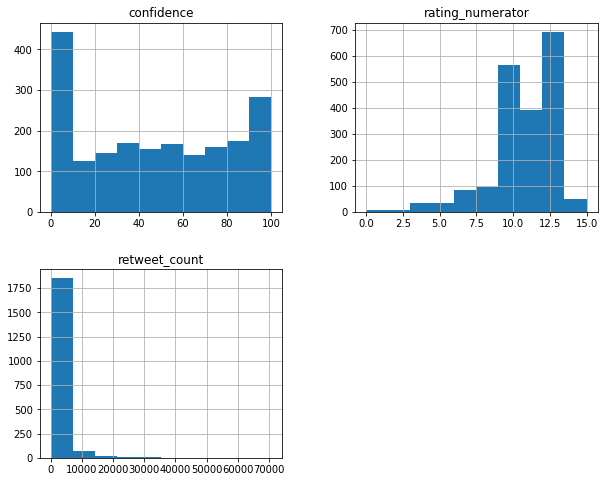

In [107]:
master_data.hist(column=['confidence','rating_numerator','retweet_count'], figsize=(10,8))

### Is there any relationship between Retweet and Favorites?

In [108]:
master_data[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.928492
favorite_count,0.928492,1.000000


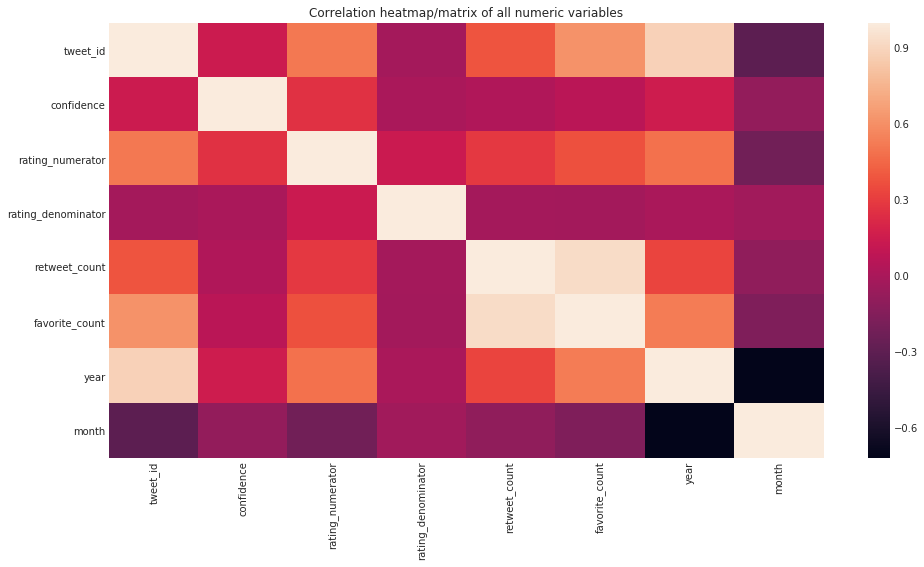

In [109]:
fig = plt.figure(figsize=(16,8)) 
sns.set_style('whitegrid')

corr = master_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);
plt.title('Correlation heatmap/matrix of all numeric variables');

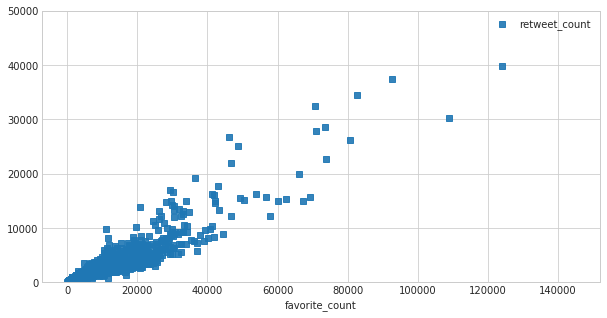

In [110]:
#Retweet count over time
master_data.plot(y='retweet_count',x='favorite_count',style='s',alpha=0.9,figsize=(10,5),ylim=[10,50000]);


### Insights 1.

There is a strong positive corrolation between Retweets and Favorites. So the higher the retweets , the higher the favorites and in this case, both the retweets and favorites have weakened over time

### What are the Top 10 Dog Breeds?

In [111]:
#most common dog breed
top_dog_breeds=master_data[master_data.breed!='Unknown'].breed.value_counts().head(10).to_frame().reset_index().rename(columns={'index': 'breed', 'breed': 'total'})

In [112]:
top_dog_breeds

,breed,total
0,Golden_retriever,156
1,Labrador_retriever,103
2,Pembroke,94
3,Chihuahua,90
4,Pug,62
5,Toy_poodle,49
6,Chow,48
7,Pomeranian,41
8,Samoyed,41
9,Malamute,33


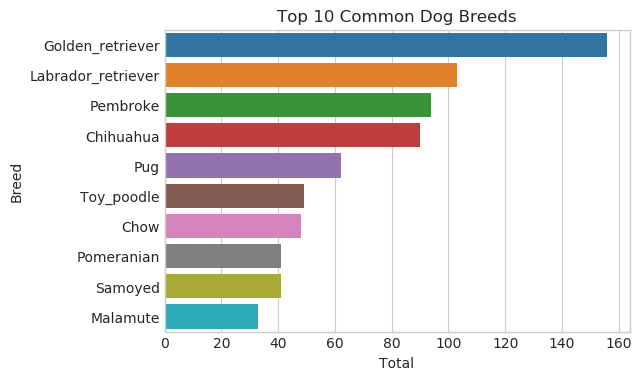

In [113]:
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='breed', data=top_dog_breeds);
ax.set_title('Top 10 Common Dog Breeds');
ax.set_ylabel('Breed');
ax.set_xlabel('Total');

### What are the Top  Dog Stages?

In [114]:
top_dog_stages=master_data[master_data.dog_stage!='None'].dog_stage.value_counts().to_frame().reset_index().rename(columns={'index': 'dog_stage', 'dog_stage': 'total'})

In [115]:
top_dog_stages

,dog_stage,total
0,pupper,209
1,doggo,62
2,puppo,23
3,floofer,8


In [116]:
top_dog_stages.describe()

,total
count,4.00000
mean,75.50000
std,91.86403
min,8.00000
25%,19.25000
50%,42.50000
75%,98.75000
max,209.00000


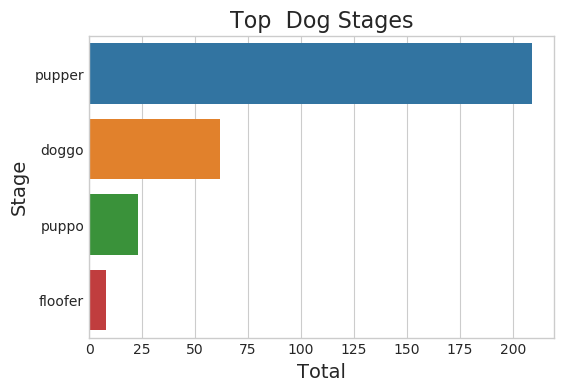

In [117]:
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_stage', data=top_dog_stages);
ax.set_title('Top  Dog Stages',fontsize=16);
ax.set_ylabel('Stage',fontsize=14);
ax.set_xlabel('Total',fontsize=14);

### What dog breed scored the most confidence score?

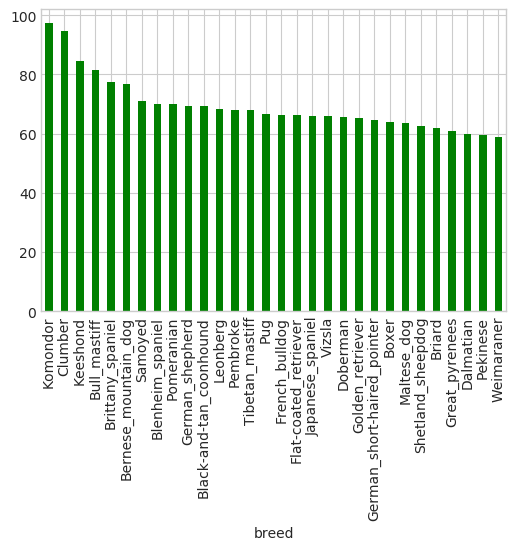

In [118]:
plt.figure(dpi=100)

master_data.groupby('breed')['confidence'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')


### Relationship between breeds,retweet_count, favorite_count and confidence

In [119]:
master_data[['rating_numerator', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating_numerator,retweet_count,favorite_count,confidence
count,1963.000000,1963.000000,1963.000000,1963.000000
mean,10.562404,2255.699440,7750.416709,46.520429
std,2.222247,4034.660617,11417.632340,33.957725
min,0.000000,11.000000,66.000000,0.000000
25%,10.000000,496.000000,1651.000000,14.028350
50%,11.000000,1087.000000,3500.000000,45.960400
75%,12.000000,2580.000000,9641.000000,77.650600
max,15.000000,70646.000000,144754.000000,99.995600


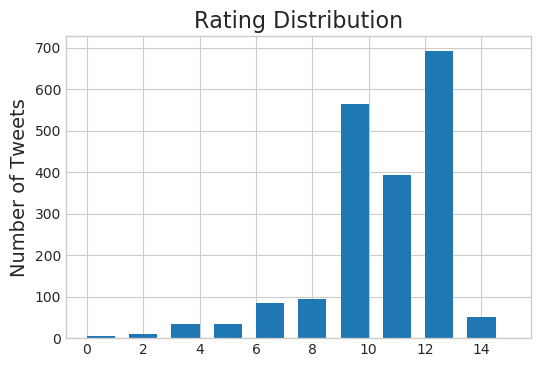

In [120]:
plt.figure(dpi=100)

master_data['rating_numerator'].plot(kind='hist',bins=10,width=1)
plt.xlabel('Ratings',fontsize=14)
plt.ylabel('Number of Tweets',fontsize=14)
plt.title('Rating Distribution',fontsize=16)
plt.show()

### What month did people tweet the most?

In [121]:
months_counts=master_data.month.value_counts().reset_index().rename(columns={'index': 'month', 'month': 'total'})

In [122]:
months_counts

,month,total
0,12,413
1,11,347
2,1,232
3,2,171
4,3,163
5,7,136
6,6,122
7,5,98
8,4,94
9,10,65


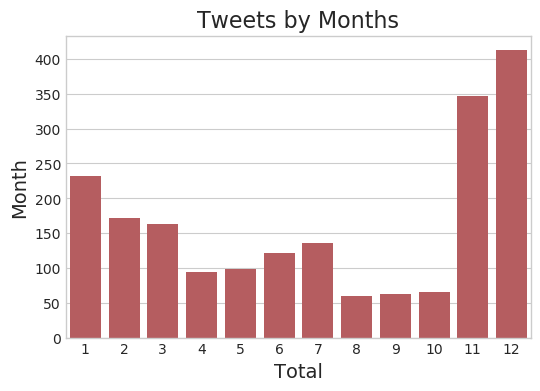

In [123]:
plt.figure(dpi=100)

sns.set_color_codes()
ax=sns.barplot(x='month',y='total',data=months_counts,color='r')

ax.set_title('Tweets by Months',fontsize=16);
ax.set_ylabel('Month',fontsize=14);
ax.set_xlabel('Total',fontsize=14);

In [124]:
master_data.weekday.value_counts()

Monday       325
Tuesday      291
Wednesday    291
Friday       277
Thursday     277
Sunday       254
Saturday     248
Name: weekday, dtype: int64

### Has engangements declined over the years?

In [125]:
master_data.year.value_counts()

2016    959
2015    654
2017    350
Name: year, dtype: int64

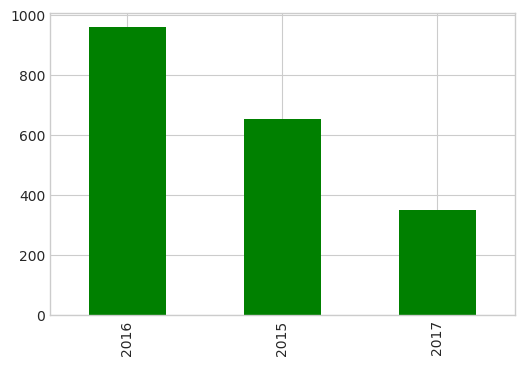

In [126]:
plt.figure(dpi=100)

master_data.year.value_counts().plot(kind='bar',color='green')


In [133]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 15 columns):
tweet_id              1963 non-null int64
name                  1963 non-null object
breed                 1963 non-null object
dog_stage             1963 non-null object
confidence            1963 non-null float64
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
retweet_count         1963 non-null float64
favorite_count        1963 non-null float64
year                  1963 non-null int64
month                 1963 non-null int64
weekday               1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 230.1+ KB


### Is there a pattern for tweets from a source?

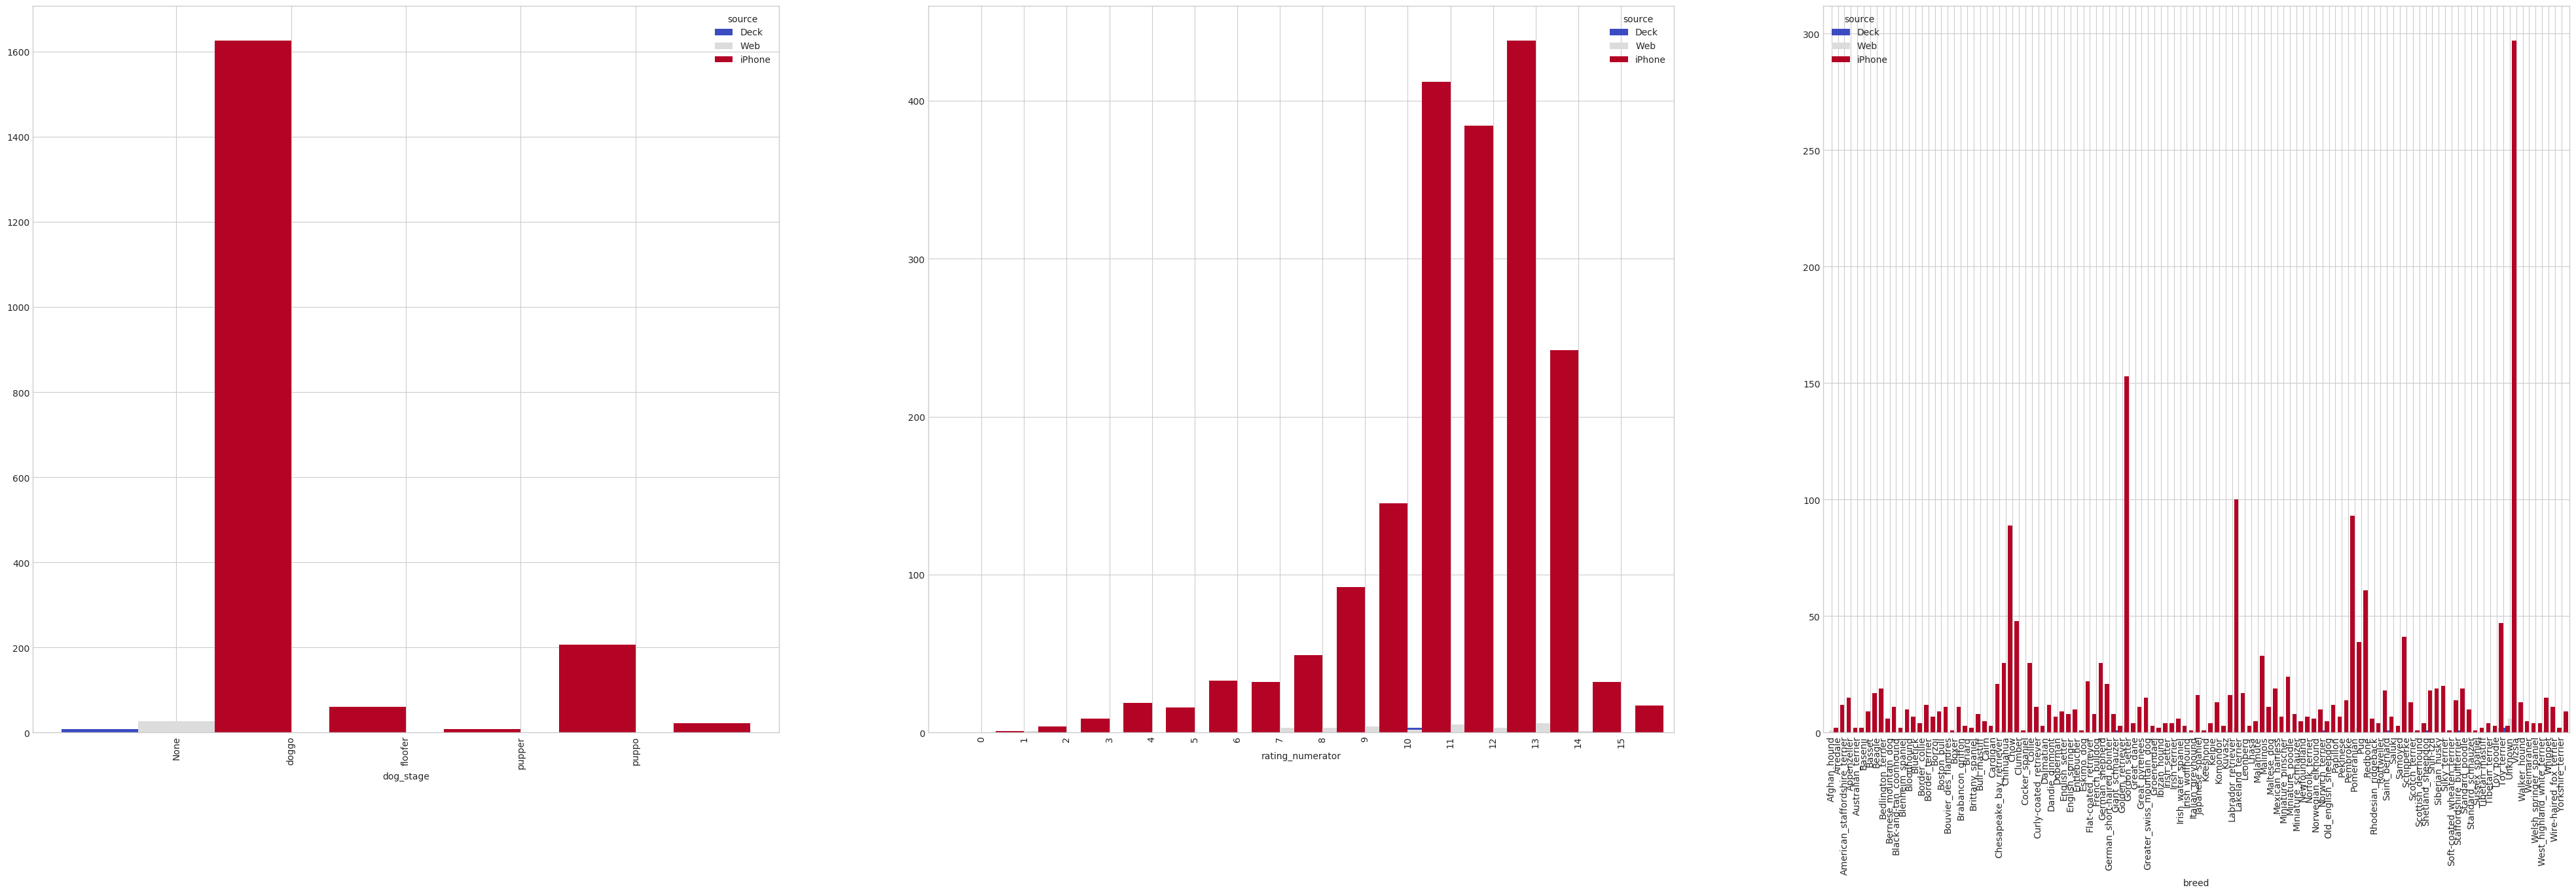

In [134]:
#plt.figure(dpi=100)
factors=['dog_stage','rating_numerator','breed']

fig = plt.figure(figsize=(50 ,50),dpi=100)
for i, var in enumerate(factors):
    ax = fig.add_subplot(3, 3, i+1)
    master_data.groupby([var, 'source'])[var].count().unstack('source').plot(ax=ax, kind='bar', stacked=False,cmap='coolwarm',width=2)

### What are the top 10 Dog Names ?

In [145]:
top_dog_name=master_data[master_data.name!='None'].name.value_counts().head(10)

In [146]:
top_dog_name

Oliver     10
Charlie    10
Cooper     10
Penny       9
Tucker      9
Lucy        9
Winston     8
Sadie       8
Toby        7
Daisy       7
Name: name, dtype: int64

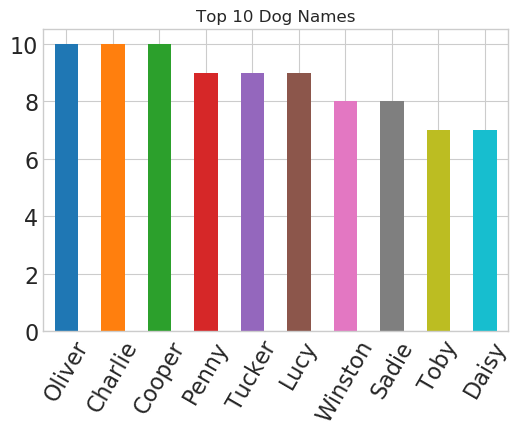

In [158]:
plt.figure(dpi=100)
top_dog_name.plot(kind='bar',title='Top 10 Dog Names',fontsize=16)
plt.xticks(rotation=60)


plt.show()

### Insights:
1. There is a strong positive corrolation between Retweets and Favorites. So the higher the retweets , the higher the favorites and in this case, both the retweets and favorites have weakened over time

2. The chat above indicates that people are most likely to post a tweet between November and December which are winter months. This is to say that Tweeps engage more when indoors or in colder months

3. Tweeps prefer posting pictures of Puppies.

4. Tweets and tweet engagement has dropped over years